In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [23]:
msft_ticker = yf.Ticker('MSFT')
apple_ticker = yf.Ticker("AAPL")

msft_close = pd.DataFrame(msft_ticker.history('1y')).reset_index()
apple_close = pd.DataFrame(apple_ticker.history('1y')).reset_index()
msft_close.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-08-12 00:00:00-04:00,403.962820,405.649897,401.164269,403.714722,16762900,0.00,0.0
1,2024-08-13 00:00:00-04:00,406.473572,411.792805,406.453735,410.859955,19414300,0.00,0.0
2,2024-08-14 00:00:00-04:00,411.643939,414.541735,409.311844,413.688263,18267000,0.00,0.0
3,2024-08-15 00:00:00-04:00,417.356768,418.659141,415.229238,418.579620,20752100,0.75,0.0
4,2024-08-16 00:00:00-04:00,418.152124,418.887807,414.871311,416.034515,22775600,0.00,0.0


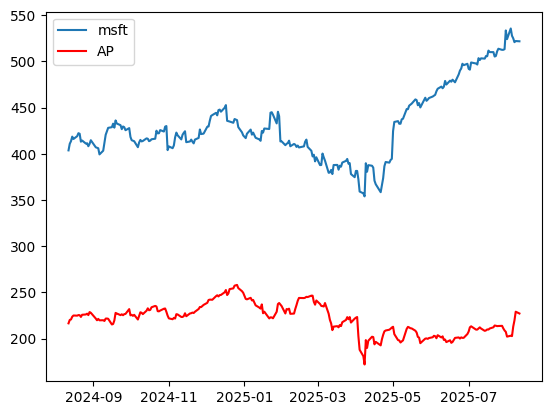

In [24]:
#plt.figure(15,5)
plt.plot(msft_close['Date'], msft_close['Close'], label='msft')
plt.plot(apple_close['Date'], apple_close['Close'], label='AP', color='red')
plt.legend()
plt.show()

In [25]:
coint = sm.tsa.stattools.coint(msft_close['Close'],apple_close['Close'])
print(coint[1])

0.9735307293665771


In [29]:
companies = ['AAPL', 'MSFT','GOOG','TSLA', 'NVDA', 'META', 'AMZN']
tickers = yf.Tickers(companies)
history = pd.DataFrame(tickers.history())

[*********************100%***********************]  7 of 7 completed


In [30]:
history.head()

Price            Close                          ...    Volume                     
Ticker            AAPL        AMZN        GOOG  ...      MSFT       NVDA      TSLA
Date                                            ...                               
2025-07-14  208.383499  225.690002  182.809998  ...  12058800  136975800  78043400
2025-07-15  208.872955  226.350006  183.100006  ...  14927200  230627400  77556300
2025-07-16  209.921768  223.190002  183.770004  ...  15154400  158831500  97284800
2025-07-17  209.781921  223.880005  184.699997  ...  17503100  160841100  73922900
2025-07-18  210.940598  226.130005  185.940002  ...  21209700  146456400  94255000

[5 rows x 49 columns]

In [31]:
for i in range(len(companies)-1):
    for j in range(i+1,len(companies)):
        coint = sm.tsa.stattools.coint(history['Close'][companies[i]],history['Close'][companies[j]])
        print(f"Coint for {companies[i]} and {companies[j]}: {coint[1]}")

Coint for AAPL and MSFT: 0.0004548932669477454
Coint for AAPL and GOOG: 0.21972194839851233
Coint for AAPL and TSLA: 0.6501555865778752
Coint for AAPL and NVDA: 5.441386295510226e-08
Coint for AAPL and META: 0.3977333614613532
Coint for AAPL and AMZN: 0.9075022102805501
Coint for MSFT and GOOG: 0.9823402700159363
Coint for MSFT and TSLA: 0.6275337397987961
Coint for MSFT and NVDA: 0.2637216204510552
Coint for MSFT and META: 0.7476549968696811
Coint for MSFT and AMZN: 0.576018743083129
Coint for GOOG and TSLA: 1.0
Coint for GOOG and NVDA: 0.4366112726845386
Coint for GOOG and META: 0.41989452762552315
Coint for GOOG and AMZN: 1.0
Coint for TSLA and NVDA: 0.9652438146867615
Coint for TSLA and META: 0.9799587358516909
Coint for TSLA and AMZN: 0.9449417790213837
Coint for NVDA and META: 0.01508264679852741
Coint for NVDA and AMZN: 1.0
Coint for META and AMZN: 0.0977266594084426


In [ ]:
aapl = history['Close']['AAPL']
gogl = history['Close']['GOGL']
dates = history.reset_index()['Date']


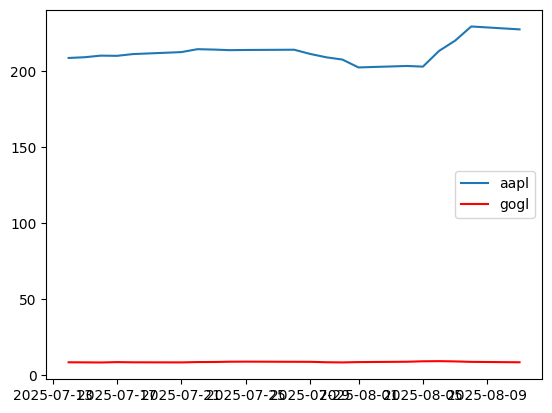

In [ ]:
plt.plot(dates, aapl, label='aapl')
plt.plot(dates, gogl, label='gogl', color='red')
plt.legend()
plt.show()

In [ ]:
b = np.polyfit(aapl, gogl, 1)[0]
spread = aapl - b * gogl

zscore = (spread - spread.mean()) / spread.std()

print(zscore)

Date
2025-07-14   -0.540048
2025-07-15   -0.468224
2025-07-16   -0.314327
2025-07-17   -0.334914
2025-07-18   -0.164887
2025-07-21    0.025639
2025-07-22    0.306940
2025-07-23    0.270290
2025-07-24    0.213080
2025-07-25    0.230651
2025-07-28    0.255596
2025-07-29   -0.151794
2025-07-30   -0.477038
2025-07-31   -0.693891
2025-08-01   -1.454522
2025-08-04   -1.312443
2025-08-05   -1.375552
2025-08-06    0.138231
2025-08-07    1.131856
2025-08-08    2.497747
2025-08-11    2.217608
dtype: float64
